# Logistic Regression With Roc curve ancd ROC AUC score

In [1]:
# importing necessary libraries
from sklearn.datasets import make_classification # to create a synthetic dataset
from sklearn.linear_model import LogisticRegression # for the logistic regression model
from sklearn.model_selection import train_test_split # to split data into training and testing sets
from sklearn.metrics import roc_curve,roc_auc_score # to calculate roc curve and auc score
from matplotlib import pyplot as plt # to plot the roc curve

In [2]:
# generate a synthetic two-class dataset
X,y = make_classification(n_samples =1000,n_classes = 2,random_state = 1)

In [3]:
# split the dataset into train and test sets
from sklearn.model_selection import train_test_split

In [4]:
# splitting the data with 25% for testing and 75% for training
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)

In [5]:
# we have created a dummy model with default 0 as output for comparison
dummy_model_prob = [ 0 for _ in range(len(y_test))]
# display the dummy model probabilities
dummy_model_prob

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [6]:
# lets create a basic logistic regression model
model = LogisticRegression()
# train the logistic regression model
model.fit(X_train,y_train)

LogisticRegression()

In [7]:
# predicting probabilities for the test set
model_proba = model.predict_proba(X_test)

In [8]:
# lets focus on the probability of the positive outcome (class 1)
model_proba = model_proba[:,1]
# display the probabilities of the positive outcome
model_proba

array([9.99041225e-01, 9.68866009e-02, 4.89372036e-01, 8.10046974e-01,
       1.12426807e-01, 4.39872005e-01, 8.29460814e-01, 7.13822440e-01,
       8.87707883e-01, 8.67973855e-01, 5.43854787e-04, 8.31200361e-01,
       1.91030219e-01, 5.39053079e-01, 7.28060254e-01, 8.23507048e-01,
       9.38587042e-01, 6.38367304e-01, 1.10159811e-01, 2.41034347e-01,
       1.15857322e-02, 4.90154702e-01, 8.88085107e-01, 9.97948102e-01,
       1.36945498e-01, 1.32643249e-02, 6.45087847e-01, 9.69507009e-01,
       3.99070556e-02, 2.38152731e-02, 3.69213417e-01, 3.40314906e-02,
       2.29858043e-01, 9.57101721e-01, 5.44958479e-01, 6.56791269e-01,
       1.52123558e-02, 2.93410161e-02, 7.80393330e-01, 2.99088014e-02,
       9.28398422e-01, 8.43395917e-01, 1.60117892e-02, 5.78395703e-04,
       6.61496895e-02, 6.69762422e-02, 9.97948178e-01, 6.55755704e-01,
       8.94036983e-01, 6.07000680e-02, 2.10340754e-02, 3.23954283e-02,
       1.03560315e-01, 5.44021349e-02, 5.64730236e-01, 9.87033757e-01,
      

In [9]:
# lets calculate the auc scores for both dummy and real models
dummy_model_auc =roc_auc_score(y_test,dummy_model_prob)
model_auc= roc_auc_score(y_test,model_proba)

In [10]:
# display the auc scores
dummy_model_auc,model_auc

(np.float64(0.5), np.float64(0.9108885464817668))

In [11]:
# calculate roc curve points for both models
dummy_fpr, dummy_tpr, dummy_thresholds = roc_curve(y_test, dummy_model_prob)
model_fpr, model_tpr, model_thresholds = roc_curve(y_test, model_proba)

In [12]:
# display the fpr, tpr, and thresholds for the logistic regression model
model_fpr, model_tpr, model_thresholds

(array([0.        , 0.        , 0.        , 0.00757576, 0.00757576,
        0.01515152, 0.01515152, 0.02272727, 0.02272727, 0.03030303,
        0.03030303, 0.03787879, 0.03787879, 0.04545455, 0.04545455,
        0.0530303 , 0.0530303 , 0.06060606, 0.06060606, 0.06818182,
        0.06818182, 0.08333333, 0.08333333, 0.09090909, 0.09090909,
        0.09848485, 0.09848485, 0.11363636, 0.11363636, 0.12121212,
        0.12121212, 0.12878788, 0.12878788, 0.15909091, 0.15909091,
        0.18181818, 0.18181818, 0.18939394, 0.18939394, 0.20454545,
        0.20454545, 0.21969697, 0.21969697, 0.22727273, 0.22727273,
        0.24242424, 0.24242424, 0.31060606, 0.31060606, 0.32575758,
        0.32575758, 0.38636364, 0.38636364, 0.40909091, 0.40909091,
        0.41666667, 0.41666667, 0.53030303, 0.53030303, 0.53787879,
        0.53787879, 1.        ]),
 array([0.        , 0.00847458, 0.1440678 , 0.1440678 , 0.23728814,
        0.23728814, 0.28813559, 0.28813559, 0.36440678, 0.36440678,
        0.3728

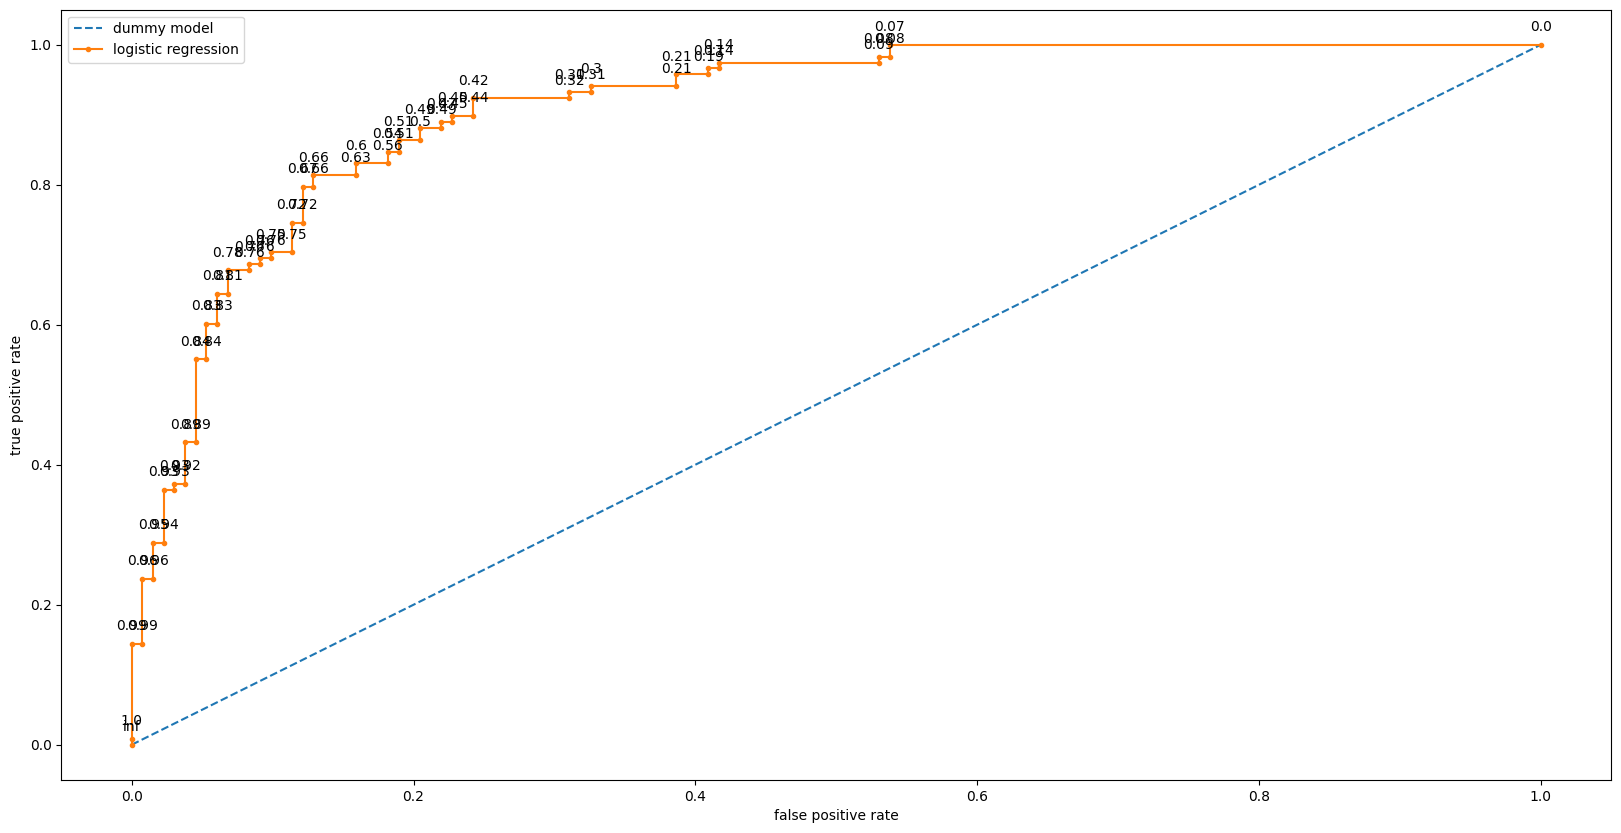

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(20, 10))

# plot roc curves for both dummy and logistic regression models
ax.plot(dummy_fpr, dummy_tpr, linestyle='--', label='dummy model')
ax.plot(model_fpr, model_tpr, marker='.', label='logistic regression')

# annotate thresholds on the logistic regression roc curve
for fpr, tpr, thresh in zip(model_fpr, model_tpr, model_thresholds):
    ax.annotate(f"{np.round(thresh,2)}", (fpr, tpr), textcoords="offset points", xytext=(0,10), ha='center')

# set labels and add legend
ax.set_xlabel('false positive rate')
ax.set_ylabel('true positive rate')
ax.legend()
# display the plot
plt.show()

#Conclusions

the auc score for the dummy model is 0.5, which is expected for a random classifier. the logistic regression model achieved an auc score of 0.91, indicating that it is a good model for this classification task. the roc curve plot visually confirms that the logistic regression model performs significantly better than the dummy model. the annotations on the logistic regression roc curve show the probability thresholds at different points on the curve.

## references

- scikit-learn: https://scikit-learn.org/stable/
- matplotlib: https://matplotlib.org/

created by charan n 6th sem mitmysore